In [1]:
# 데이터 통계
import collections

num_firends = [100, 40, 30, 54, 25, 3, 100, 100, 100, 3, 3]
friend_counts = collections.Counter(num_firends)
print('friends:', friend_counts)

friends: Counter({100: 4, 3: 3, 40: 1, 30: 1, 54: 1, 25: 1})


friends: Counter({54: 8, 30: 7, 100: 4, 3: 3, 40: 1, 25: 1})


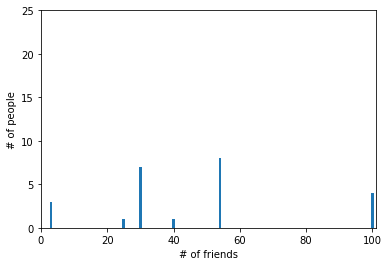

In [2]:
import collections
import matplotlib.pyplot as plt

# 1차원 리스트 카운팅
num_firends = [100, 40, 30, 30, 30, 30, 30, 30, 30, 54, 54, 54, 54, 54, 54, 54, 54, 25, 3, 100, 100, 100, 3, 3]
friend_counts = collections.Counter(num_firends)
print('friends:', friend_counts)

# 가시화 추가
xs = range(101)
ys = [friend_counts[x] for x in xs]

plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.xlabel('# of friends')
plt.ylabel('# of people')
plt.show()

In [3]:
# 리스트 객체 갯수 구하기
num_firends = [100, 40, 30, 30, 30, 30, 30, 30, 30, 30, 54, 54, 54, 54, 54, 54, 54, 54, 25, 3, 100, 100, 100, 3, 3]
num_points = len(num_firends)
print(num_points)

25


In [4]:
# 최대값 구하기
max_value = max(num_firends)
print(max_value)
# 최소값 구하기
min_value = min(num_firends)
print(min_value)

100
3


In [5]:
num_firends = [100, 40, 30, 30, 30, 30, 30, 30, 30, 30, 54, 54, 54, 54, 54, 54, 54, 54, 25, 3, 100, 100, 100, 3, 3]

sorted_values = sorted(num_firends)         # 오름차순으로 정렬된 리스트 반환
second_smallest_value = sorted_values[1]    # 두번째로 작은 값
second_largest_value = sorted_values[-2]    # 두번째로 큰 값, 파이썬에서 -1 은 가장 뒤를 말한다

In [6]:
from __future__ import division # 값을 더 정확하게 계산

num_firends = [1200, 15, 10, 10, 9, 4, 3, 3, 2, 1]


# 평균값 계산
def mean(x):
    return sum(x) / len(x)

avgOfFriends = mean(num_firends)
print(avgOfFriends)


# 중앙값 계산
def median(v):
    n = len(v)
    sorted_v = sorted(v)                # 정렬 시킨다
    midpoint = n // 2                   # // 로 나누면 정수형, / 로 나누면 실수형

    if n % 2 == 1:
        return sorted_v(midpoint)       # 리스트가 홀 수면 가운데 값
    else:
        lo = midpoint -1                # 짝수면 가운데의 2개의 값의 평균
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

medianOfFriends = median(num_firends)
print(medianOfFriends)

125.7
6.5


In [7]:
# 최대, 최소 사이의 범위
num_firends = [100, 15, 10, 10, 9, 4, 3, 3, 2, 1]

def data_range(x):
    return max(x) - min(x)

data_range(num_firends)

99

In [8]:
# 상, 하위 25% 사이의 차이
def quantile(x, p):
    p_index = int(p * len(x))
    return sorted(x) [p_index]


def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

In [9]:
# 분산(variance) 데이터들 사이에 얼마나 차이가 있는지 가늠하기
import math

num_firends = [100, 15, 10, 10, 9, 4, 3, 3, 2, 1]

def mean(x):
    return sum(x) / len(x)


def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))


def sum_of_squares(v):
    return dot(v, v)


def de_mean(x):     # 요소들과 평균의 차이
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]


def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n-1)   # n으로 나누기보다 n-1로 나누어야 정확하게 보정됨

print(variance(num_firends))

897.7888888888888


In [10]:
# 표준편차(standard deviation) 분산은 데이터의 차이에 제곱을 해주기 때문에 그 값을 sqrt를 해줘서 현실적으로 바꿔줌
def standard_deviation(x):
    return math.sqrt(variance(x))

print(standard_deviation(num_firends))

29.96312548598508


In [11]:
# 공분산(covariance)
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

connection_time = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
working_time = [1, 2]
covariance(connection_time, working_time)

0.05555555555555555

In [12]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)

    if stdev_x > 0 and stdev_y > 0 :
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0    # 편차가 존재하지 않는다면 상관관계는 0